In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'YearPredictionMSD.txt',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [2]:
audio_input = data.iloc[:, 1:91]
audio_input

audio_output = data.iloc[:,0:1]
audio_output.drop(axis=0,index=0)

,0
1,2001
2,2001
3,2001
4,2001
5,2001
...,...
515340,2006
515341,2006
515342,2006
515343,2006


In [3]:
from sklearn.preprocessing import Normalizer
transform_audio=Normalizer().fit(audio_input)
audio_input=transform_audio.transform(audio_input)
audio_input

array([[ 3.04950981e-02,  1.31100865e-02,  4.46204694e-02, ...,
        -1.11263738e-03, -1.67689558e-02,  1.38193246e-03],
       [ 1.81912562e-02,  6.87948548e-03,  2.62523336e-02, ...,
         4.49793216e-03,  2.18130640e-02,  1.00492122e-02],
       [ 2.88243353e-02,  1.80196260e-02,  3.15742102e-02, ...,
        -3.31419269e-05,  2.24400542e-02, -3.75286079e-04],
       ...,
       [ 7.44297825e-03,  2.08759544e-03, -6.38606047e-03, ...,
        -1.00139791e-03,  8.90006695e-03, -1.33487175e-03],
       [ 1.03585683e-02,  7.59515230e-03, -7.85628984e-04, ...,
         4.76634289e-03,  3.47842603e-03,  9.32260917e-03],
       [ 2.74000523e-02,  3.12356758e-02,  1.39461060e-02, ...,
        -2.91404861e-03,  1.70960949e-02,  6.43217717e-03]])

In [4]:
ind=[]

values=audio_output.value_counts()
for i in list(values.index):
    ind.append(i[0])

<BarContainer object of 89 artists>

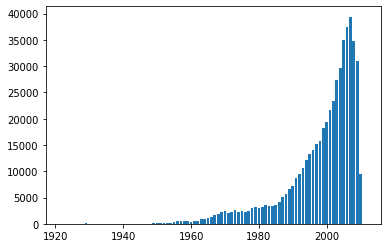

In [5]:
plt.bar(ind,values.values)

In [6]:
from sklearn.decomposition import PCA
pca_data=PCA(n_components=2)
accu=pca_data.fit_transform(audio_input)
accu

array([[-0.1923099 ,  0.06533933],
       [ 0.33158305, -0.08501844],
       [-0.17998727,  0.0085316 ],
       ...,
       [-0.32234284, -0.01715418],
       [ 0.11394497, -0.05168805],
       [-0.27950106,  0.02618955]])

In [7]:
from sklearn.model_selection import train_test_split
accu_train, accu_test= accu[:463715], accu[463716:]
accuOpt_train, accuOpt_test =audio_output[:463715],audio_output[463716:]

In [8]:
import numpy as np
accuOpt_train = accuOpt_train.to_numpy()
accuOpt_train

array([[2001],
       [2001],
       [2001],
       ...,
       [2007],
       [2006],
       [2007]], dtype=int64)

In [9]:
len(accuOpt_train)

463715

In [10]:
output=[]
for i in range(len(accuOpt_train)):
    output.append(accuOpt_train[i][0])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neighbour = KNeighborsClassifier(n_neighbors=159)
neighbour.fit(accu_train, output)

KNeighborsClassifier(n_neighbors=159)

In [12]:
predict_neighbour=neighbour.predict(accu_test)

In [13]:
print(predict_neighbour)

[2006 2005 2006 ... 2002 2006 2005]


In [14]:
accuOpt_test = accuOpt_test.to_numpy()
actual=[]
for i in range(len(accuOpt_test)):
    actual.append(accuOpt_test[i][0])

In [15]:
from collections import defaultdict
list1=[]
final_dict=defaultdict(int)
for i in range(len(predict_neighbour)):
    diff=abs(int(predict_neighbour[i])-int(actual[i]))
    final_dict[diff] +=1
    if diff==0 or diff==1:
        list1.append(predict_neighbour[i])

<BarContainer object of 80 artists>

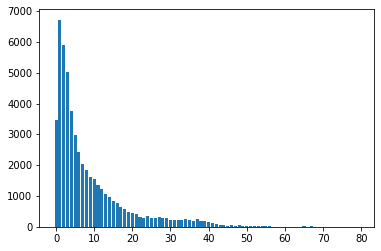

In [16]:
import matplotlib.pyplot as  plt
plt.bar(final_dict.keys(),final_dict.values())

In [17]:
final_dict=sorted(final_dict.items())
print(dict(final_dict))

{0: 3454, 1: 6723, 2: 5891, 3: 5018, 4: 3771, 5: 2987, 6: 2436, 7: 2029, 8: 1844, 9: 1631, 10: 1537, 11: 1363, 12: 1231, 13: 1061, 14: 972, 15: 837, 16: 783, 17: 636, 18: 575, 19: 469, 20: 441, 21: 410, 22: 334, 23: 293, 24: 356, 25: 297, 26: 295, 27: 320, 28: 282, 29: 270, 30: 227, 31: 219, 32: 206, 33: 219, 34: 244, 35: 227, 36: 201, 37: 237, 38: 179, 39: 186, 40: 163, 41: 134, 42: 99, 43: 70, 44: 43, 45: 35, 46: 43, 47: 34, 48: 46, 49: 39, 50: 29, 51: 29, 52: 19, 53: 17, 54: 11, 55: 15, 56: 10, 57: 7, 58: 7, 59: 6, 60: 3, 61: 3, 62: 2, 63: 1, 64: 6, 65: 12, 66: 8, 67: 13, 68: 2, 69: 2, 70: 1, 71: 3, 72: 1, 73: 3, 74: 3, 75: 2, 76: 4, 77: 8, 78: 2, 79: 3}


In [18]:
len(actual)

51629

In [19]:
print(set(predict_neighbour))

{1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009}


In [20]:
a1=[]
p1=[]
for i in range(len(actual)):
    a1.append(actual[i]-(actual[i]%10))
    p1.append(predict_neighbour[i]-(predict_neighbour[i]%10))

In [21]:
list1=[]
final_dict1=defaultdict(int)
for i in range(len(p1)):
    diff=abs(int(p1[i])-int(a1[i]))
    final_dict1[diff] +=1


<BarContainer object of 9 artists>

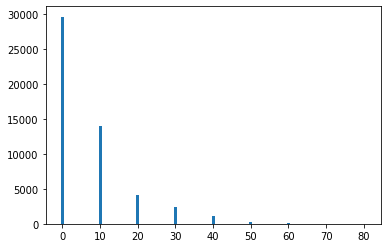

In [22]:
plt.bar(final_dict1.keys(),final_dict1.values())